In [1]:
import torch
import numpy as np

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

print(device)

cuda:0


In [2]:
# import package

# model
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
from torch import optim
from torch.optim.lr_scheduler import StepLR

# dataset and transformation
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import os
from torchvision import models
import torch.nn as nn
import torch.nn.functional as F
import torchvision

# display images
from torchvision import utils
import matplotlib.pyplot as plt
%matplotlib inline


# utils
import numpy as np
from torchsummary import summary
import time
import copy

import os
from tqdm.notebook import tqdm
from warnings import filterwarnings
filterwarnings('ignore')

import torch
from torch import nn, optim
from torch.backends import cudnn
cudnn.benchmark = True
from randaugment import RandAugment, ImageNetPolicy

In [3]:
def display_images():
    fig, subplots = plt.subplots(1,5, figsize=(13,6))
    for i in range(5):
        axil = subplots.flat[i]
        original_img = Image.fromarray(cifar10.data[i])
        axil.imshow(original_img)
        axil.set_title('original_img')

In [4]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [5]:
# 데이터셋의 루트 디렉터리와 이미지 폴더를 지정합니다.
root_dir = '../data/'  # 데이터셋의 루트 디렉터리 경로
train_folder = 'kfood_health_train'  # 이미지가 있는 폴더의 이름
val_folder = 'kfood_health_val'  # 이미지가 있는 폴더의 이름

In [6]:
# 이미지 전처리를 위한 변환(transform)을 정의합니다.
transform = transforms.Compose([
    transforms.Resize((244, 244)),  # 이미지 크기를 조절합니다.
    transforms.ToTensor(),  # 이미지를 Tensor로 변환합니다.
])

In [7]:
# 데이터셋을 불러옵니다.
train_ds = torchvision.datasets.ImageFolder(
    root=root_dir + train_folder,
    transform=transform
)

In [8]:
# 데이터셋을 불러옵니다.
val_ds = torchvision.datasets.ImageFolder(
    root=root_dir + val_folder,
    transform=transform
)

In [9]:
print(len(train_ds))

14115


In [10]:
print(len(val_ds))

1764


In [11]:
# # To normalize the dataset, calculate the mean and std
# train_meanRGB = [np.mean(x.numpy(), axis=(1,2)) for x, _ in train_ds]
# train_stdRGB = [np.std(x.numpy(), axis=(1,2)) for x, _ in train_ds]
# 
# train_meanR = np.mean([m[0] for m in train_meanRGB])
# train_meanG = np.mean([m[1] for m in train_meanRGB])
# train_meanB = np.mean([m[2] for m in train_meanRGB])
# train_stdR = np.mean([s[0] for s in train_stdRGB])
# train_stdG = np.mean([s[1] for s in train_stdRGB])
# train_stdB = np.mean([s[2] for s in train_stdRGB])
# 
# val_meanRGB = [np.mean(x.numpy(), axis=(1,2)) for x, _ in val_ds]
# val_stdRGB = [np.std(x.numpy(), axis=(1,2)) for x, _ in val_ds]
# 
# val_meanR = np.mean([m[0] for m in val_meanRGB])
# val_meanG = np.mean([m[1] for m in val_meanRGB])
# val_meanB = np.mean([m[2] for m in val_meanRGB])
# 
# val_stdR = np.mean([s[0] for s in val_stdRGB])
# val_stdG = np.mean([s[1] for s in val_stdRGB])
# val_stdB = np.mean([s[2] for s in val_stdRGB])
# 
# print(train_meanR, train_meanG, train_meanB)
# print(val_meanR, val_meanG, val_meanB)

In [12]:
print(train_meanR, train_meanG, train_meanB)
print(val_meanR, val_meanG, val_meanB)
print(train_stdR,train_stdG ,train_stdB)
print(val_stdR,val_stdG,val_stdB)

NameError: name 'train_meanR' is not defined

In [ ]:
# # kfood
# train_meanR=0.58394545
# train_meanG=0.51387334
# train_meanB=0.42269564
# val_meanR=0.58470017
# val_meanG=0.51500267
# val_meanB=0.4244054
# train_stdR=0.22759153
# train_stdG=0.23792826
# train_stdB=0.25431448
# val_stdR=0.22711068
# val_stdG=0.2372811
# val_stdB=0.25347996

In [13]:
# kfood_health
train_meanR=0.60938996
train_meanG=0.4901362
train_meanB=0.39612356
val_meanR=0.61192256
val_meanG=0.4893556
val_meanB=0.39328295
train_stdR=0.253585
train_stdG=0.25830352
train_stdB=0.26830465
val_stdR=0.2544102
val_stdG=0.2579448
val_stdB=0.26764154

In [14]:
# define the image transformation
train_transformation = transforms.Compose([
    RandAugment(),
    transforms.ToTensor(),
    transforms.Resize((224,224)),
    transforms.Normalize([train_meanR, train_meanG, train_meanB],[train_stdR, train_stdG, train_stdB]),
    transforms.RandomHorizontalFlip(),
    
])

val_transformation = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((224,224)),
    transforms.Normalize([train_meanR, train_meanG, train_meanB],[train_stdR, train_stdG, train_stdB]),
])

In [15]:
# apply transforamtion
train_ds.transform = train_transformation
val_ds.transform = val_transformation

# create DataLoader
train_dl = DataLoader(train_ds, batch_size=64, shuffle=True, num_workers=4)
val_dl = DataLoader(val_ds, batch_size=64, shuffle=False,num_workers=4)

image indices: [13349   235 12172  5192]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


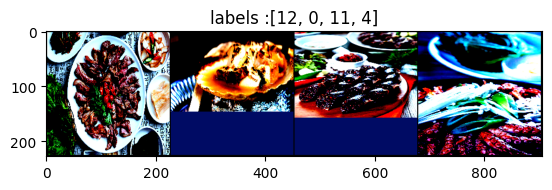

In [16]:
# display sample images 
def show(img, y=None, color=True):
    npimg = img.numpy()
    npimg_tr = np.transpose(npimg, (1,2,0))
    plt.imshow(npimg_tr)

    if y is not None:
        plt.title('labels :' + str(y))

np.random.seed(1)
torch.manual_seed(1)

grid_size = 4
rnd_inds = np.random.randint(0, len(train_ds), grid_size)
print('image indices:',rnd_inds)

x_grid = [train_ds[i][0] for i in rnd_inds]
y_grid = [train_ds[i][1] for i in rnd_inds]

x_grid = utils.make_grid(x_grid, nrow=grid_size, padding=2)

show(x_grid, y_grid)

In [17]:
class BasicBlock(nn.Module):
    expansion = 1
    def __init__(self, in_channels, out_channels, stride=1):
        super().__init__()

        # BatchNorm에 bias가 포함되어 있으므로, conv2d는 bias=False로 설정합니다.
        self.residual_function = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            nn.Conv2d(out_channels, out_channels * BasicBlock.expansion, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(out_channels * BasicBlock.expansion),
        )

        # identity mapping, input과 output의 feature map size, filter 수가 동일한 경우 사용.
        self.shortcut = nn.Sequential()

        self.relu = nn.ReLU()

        # projection mapping using 1x1conv
        if stride != 1 or in_channels != BasicBlock.expansion * out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels * BasicBlock.expansion, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels * BasicBlock.expansion)
            )

    def forward(self, x):
        x = self.residual_function(x) + self.shortcut(x)
        x = self.relu(x)
        return x


class BottleNeck(nn.Module):
    expansion = 4
    def __init__(self, in_channels, out_channels, stride=1):
        super().__init__()

        self.residual_function = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            nn.Conv2d(out_channels, out_channels * BottleNeck.expansion, kernel_size=1, stride=1, bias=False),
            nn.BatchNorm2d(out_channels * BottleNeck.expansion),
        )

        self.shortcut = nn.Sequential()

        self.relu = nn.ReLU()

        if stride != 1 or in_channels != out_channels * BottleNeck.expansion:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels*BottleNeck.expansion, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels*BottleNeck.expansion)
            )

    def forward(self, x):
        x = self.residual_function(x) + self.shortcut(x)
        x = self.relu(x)
        return x

In [18]:
class ResNet(nn.Module):
    def __init__(self, block, num_block, num_classes=10, init_weights=True):
        super().__init__()

        self.in_channels=64

        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )

        self.conv2_x = self._make_layer(block, 64, num_block[0], 1)
        self.conv3_x = self._make_layer(block, 128, num_block[1], 2)
        self.conv4_x = self._make_layer(block, 256, num_block[2], 2)
        self.conv5_x = self._make_layer(block, 512, num_block[3], 2)

        self.avg_pool = nn.AdaptiveAvgPool2d((1,1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

        # weights inittialization
        if init_weights:
            self._initialize_weights()

    def _make_layer(self, block, out_channels, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_channels, out_channels, stride))
            self.in_channels = out_channels * block.expansion

        return nn.Sequential(*layers)

    def forward(self,x):
        output = self.conv1(x)
        output = self.conv2_x(output)
        x = self.conv3_x(output)
        x = self.conv4_x(x)
        x = self.conv5_x(x)
        x = self.avg_pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

    # define weight initialization function
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)

def resnet18():
    return ResNet(BasicBlock, [2,2,2,2])

def resnet34():
    return ResNet(BasicBlock, [3, 4, 6, 3])

def resnet50():
    return ResNet(BottleNeck, [3,4,6,3])

def resnet101():
    return ResNet(BottleNeck, [3, 4, 23, 3])

def resnet152():
    return ResNet(BottleNeck, [3, 8, 36, 3])

In [19]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = resnet101().to(device)
x = torch.randn(3, 3, 224, 224).to(device)
output = model(x)
print(output.size())

torch.Size([3, 10])


In [20]:
fc_in_features = model.fc.in_features
model.fc = nn.Linear(fc_in_features, 42)
model = model.to(device)

In [21]:
weight_path = '../weight/101_4_3_TEST.pth'
# 가중치 로드
model.load_state_dict(torch.load(weight_path))

<All keys matched successfully>

In [22]:
# 모든 파라미터를 학습 불가능하게 설정
for param in model.parameters():
    param.requires_grad = False

# 모델의 레이어를 리스트로 변환
layers = list(model.modules())

# 레이어의 총 개수 계산
total_layers = len(layers)

# 마지막 1/4에 해당하는 인덱스 계산
last_quarter_index = int(total_layers * 0.98)

# 마지막 1/4 레이어의 파라미터를 학습 가능하게 설정
for i in range(last_quarter_index, total_layers):
    for param in layers[i].parameters():
        param.requires_grad = True

In [23]:
# # 모든 파라미터 학습 안되게
# for param in model.parameters():
#     param.requires_grad = False

In [24]:
model.fc = nn.Linear(fc_in_features, 13)
model = model.to(device)

In [25]:
from torchsummary import summary
summary(model, (3,244,244))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 122, 122]           9,408
       BatchNorm2d-2         [-1, 64, 122, 122]             128
              ReLU-3         [-1, 64, 122, 122]               0
         MaxPool2d-4           [-1, 64, 61, 61]               0
            Conv2d-5           [-1, 64, 61, 61]           4,096
       BatchNorm2d-6           [-1, 64, 61, 61]             128
              ReLU-7           [-1, 64, 61, 61]               0
            Conv2d-8           [-1, 64, 61, 61]          36,864
       BatchNorm2d-9           [-1, 64, 61, 61]             128
             ReLU-10           [-1, 64, 61, 61]               0
           Conv2d-11          [-1, 256, 61, 61]          16,384
      BatchNorm2d-12          [-1, 256, 61, 61]             512
           Conv2d-13          [-1, 256, 61, 61]          16,384
      BatchNorm2d-14          [-1, 256,

In [26]:
summary(model, (3, 224, 224), device=device.type)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [27]:
loss_func = nn.CrossEntropyLoss(reduction='sum')
opt = optim.Adam(model.parameters(), lr=0.001)

from torch.optim.lr_scheduler import ReduceLROnPlateau
lr_scheduler = ReduceLROnPlateau(opt, mode='min', factor=0.1, patience=5)

In [28]:
# function to get current lr
def get_lr(opt):
    for param_group in opt.param_groups:
        return param_group['lr']

In [29]:
# function to calculate metric per mini-batch
def metric_batch(output, target):
    pred = output.argmax(1, keepdim=True)
    corrects = pred.eq(target.view_as(pred)).sum().item()
    return corrects


# function to calculate loss per mini-batch
def loss_batch(loss_func, output, target, opt=None):
    loss = loss_func(output, target)
    metric_b = metric_batch(output, target)

    if opt is not None:
        opt.zero_grad()
        loss.backward()
        opt.step()

    return loss.item(), metric_b

In [35]:
# function to calculate loss and metric per epoch
def loss_epoch(model, loss_func, dataset_dl, sanity_check=False, opt=None):
    running_loss = 0.0
    running_metric = 0.0
    len_data = len(dataset_dl.dataset)

    for xb, yb in dataset_dl:

        xb = xb.to(device)
        yb = yb.to(device)
        output = model(xb)

        loss_b, metric_b = loss_batch(loss_func, output, yb, opt)

        running_loss += loss_b

        if metric_b is not None:
            running_metric += metric_b

        if sanity_check is True:
            break

    loss = running_loss / len_data
    metric = running_metric / len_data

    return loss, metric

In [36]:
class LabelSmoothingLoss(nn.Module):
    def __init__(self, classes, smoothing=0.1, dim=-1):
        super(LabelSmoothingLoss, self).__init__()
        self.confidence = 1.0 - smoothing
        self.smoothing = smoothing
        self.cls = classes
        self.dim = dim

    def forward(self, pred, target):
        pred = pred.log_softmax(dim=self.dim)
        with torch.no_grad():
            true_dist = torch.zeros_like(pred)
            true_dist.fill_(self.smoothing / (self.cls - 1))
            true_dist.scatter_(1, target.data.unsqueeze(1), self.confidence)

        return torch.mean(torch.sum(-true_dist * pred, dim=self.dim))


In [37]:
# function to start training
def train_val(model, params):
    num_epochs=params['num_epochs']
    loss_func=params["loss_func"]
    opt=params["optimizer"]
    train_dl=params["train_dl"]
    val_dl=params["val_dl"]
    sanity_check=params["sanity_check"]
    lr_scheduler=params["lr_scheduler"]
    path2weights=params["path2weights"]

    loss_history = {'train': [], 'val': []}
    metric_history = {'train': [], 'val': []}

    # # GPU out of memoty error
    # best_model_wts = copy.deepcopy(model.state_dict())

    best_loss = float('inf')

    start_time = time.time()

    for epoch in range(num_epochs):
        current_lr = get_lr(opt)
        print('Epoch {}/{}, current lr={}'.format(epoch, num_epochs-1, current_lr))

        model.train()
        train_loss, train_metric = loss_epoch(model, loss_func, train_dl, sanity_check, opt)
        loss_history['train'].append(train_loss)
        metric_history['train'].append(train_metric)

        model.eval()
        with torch.no_grad():
            val_loss, val_metric = loss_epoch(model, loss_func, val_dl, sanity_check)
        loss_history['val'].append(val_loss)
        metric_history['val'].append(val_metric)

        if val_loss < best_loss:
            best_loss = val_loss
            # best_model_wts = copy.deepcopy(model.state_dict())

            torch.save(model.state_dict(), path2weights)
            print('Copied best model weights!')
            print('Get best val_loss')

        # lr_scheduler.step(val_loss)

        print('train loss: %.6f, val loss: %.6f, accuracy: %.2f, time: %.4f min' %(train_loss, val_loss, 100*val_metric, (time.time()-start_time)/60))
        print('-'*10)

    # model.load_state_dict(best_model_wts)

    return model, loss_history, metric_history

In [38]:
# definc the training parameters
params_train = {
    'num_epochs':40,
    'optimizer':opt,
    'loss_func':LabelSmoothingLoss(classes=42, smoothing=0.1),
    'train_dl':train_dl,
    'val_dl':val_dl,
    'sanity_check':False,
    'lr_scheduler':lr_scheduler,
    'path2weights':'../weight/mission3_101_1_1.pth',
}

# create the directory that stores weights.pt
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSerror:
        print('Error')
createFolder('./models')

In [39]:
model, loss_hist, metric_hist = train_val(model, params_train)

Epoch 0/39, current lr=0.001
Copied best model weights!
Get best val_loss
train loss: 0.014962, val loss: 0.009662, accuracy: 85.77, time: 8.7639 min
----------
Epoch 1/39, current lr=0.001
Copied best model weights!
Get best val_loss
train loss: 0.009968, val loss: 0.008318, accuracy: 88.38, time: 17.2839 min
----------
Epoch 2/39, current lr=0.001
Copied best model weights!
Get best val_loss
train loss: 0.008776, val loss: 0.007498, accuracy: 90.31, time: 25.7548 min
----------
Epoch 3/39, current lr=0.001
Copied best model weights!
Get best val_loss
train loss: 0.008071, val loss: 0.007165, accuracy: 90.87, time: 34.2763 min
----------
Epoch 4/39, current lr=0.001
Copied best model weights!
Get best val_loss
train loss: 0.007398, val loss: 0.006883, accuracy: 91.84, time: 42.8733 min
----------
Epoch 5/39, current lr=0.001
Copied best model weights!
Get best val_loss
train loss: 0.007058, val loss: 0.006200, accuracy: 93.82, time: 51.3782 min
----------
Epoch 6/39, current lr=0.001


In [34]:

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs

with torch.no_grad():
    for data in val_dl:
        images, labels = data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network
        outputs = model(images.to(device))
        # the class with the highest energy is what we choose as prediction
        _ , predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy {100 * correct // total} %')

Accuracy 79 %


In [1]:
PATH = '../weight/test3.pth'
torch.save(model.state_dict(), PATH)

NameError: name 'torch' is not defined

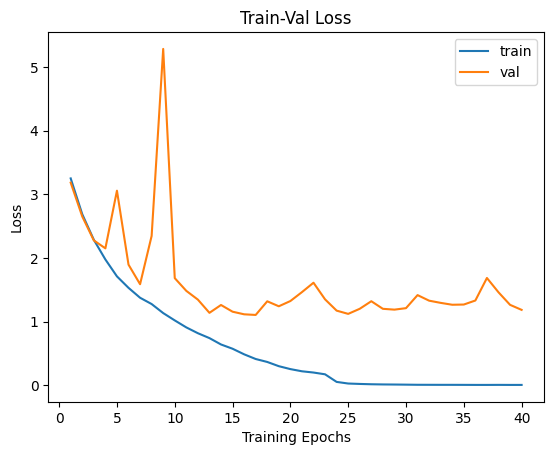

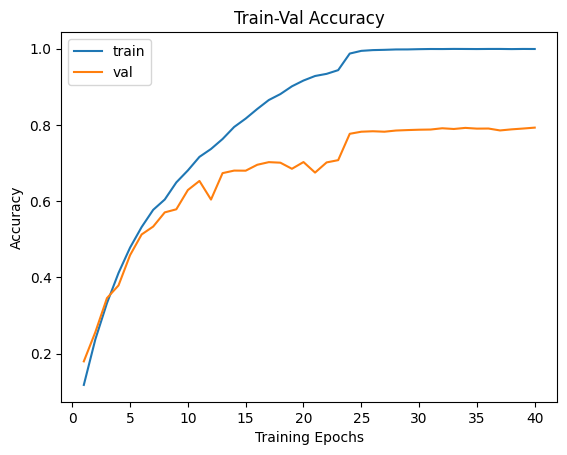

In [36]:
# Train-Validation Progress
num_epochs=params_train["num_epochs"]

# plot loss progress
plt.title("Train-Val Loss")
plt.plot(range(1,num_epochs+1),loss_hist["train"],label="train")
plt.plot(range(1,num_epochs+1),loss_hist["val"],label="val")
plt.ylabel("Loss")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()

# plot accuracy progress
plt.title("Train-Val Accuracy")
plt.plot(range(1,num_epochs+1),metric_hist["train"],label="train")
plt.plot(range(1,num_epochs+1),metric_hist["val"],label="val")
plt.ylabel("Accuracy")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()

In [33]:
# 채점시 사용되는 코드
# 본인의 코드에 사용해도 된다.

@torch.no_grad()
def validate_epoch(model: nn.Module, data_loader: DataLoader, device: torch.device):
    ''' data_loader provides inputs and GTs.
        model receives input images from data_loader and produces logits.
        returns the accuracy of model in percent.
    '''
    model.eval()
    accuracies = []
    for images, labels in tqdm(data_loader, total=len(data_loader), mininterval=1, desc='measuring accuracy'):
        images = images.to(device)
        labels = labels.to(device)

        logits = model(images)
        pred = torch.argmax(logits, dim=1)

        accuracies.append(pred == labels)

    accuracy = torch.concat(accuracies).float().mean() * 100
    return accuracy.item()

In [34]:
validate_epoch(model, val_dl, device) #10에폭까지

measuring accuracy:   0%|          | 0/132 [00:00<?, ?it/s]

80.10957336425781